In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline

import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization
from sklearn.preprocessing import LabelEncoder

## Data Import

In [2]:
# Read in files and print the information
train_feature_df = pd.read_csv('data/train_features.csv')
train_target_df = pd.read_csv('data/train_salaries.csv')
test_feature_df = pd.read_csv('data/test_features.csv')

## Data Overview

In [3]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


Use .info() to see length and dtypes

In [6]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [8]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Check for duplicates

In [9]:
train_feature_df.duplicated().sum()

0

In [10]:
train_target_df.duplicated().sum()

0

In [11]:
test_feature_df.duplicated().sum()

0

### Identify numerical and categorical variables

In [12]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']

In [14]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### Summarize numerical and categorical variables separately

In [15]:
train_feature_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [16]:
train_feature_df.describe(include = ['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685275264,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


### Merge features and targets into single data frame

In [17]:
# Merge the features and salaries on jobId, delete original file to save memory
train_df = pd.merge(train_feature_df, train_target_df, on='jobId')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [19]:
print ("Rows     : " ,train_df.shape[0])
print ("Columns  : " ,train_df.shape[1])
print ("\nFeatures : \n" ,train_df.columns.tolist())
print ("\nUnique values :  \n",train_df.nunique())

Rows     :  1000000
Columns  :  9

Features : 
 ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis', 'salary']

Unique values :  
 jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64


In [20]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [21]:
train_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

## Data Cleaning

In [22]:
missing_data = train_df.isnull()

In [23]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

jobId
False    1000000
Name: jobId, dtype: int64

companyId
False    1000000
Name: companyId, dtype: int64

jobType
False    1000000
Name: jobType, dtype: int64

degree
False    1000000
Name: degree, dtype: int64

major
False    1000000
Name: major, dtype: int64

industry
False    1000000
Name: industry, dtype: int64

yearsExperience
False    1000000
Name: yearsExperience, dtype: int64

milesFromMetropolis
False    1000000
Name: milesFromMetropolis, dtype: int64

salary
False    1000000
Name: salary, dtype: int64



#### There are 10000 rows in this dataset, and we are getting 10000 false values for all columns, indicating that there are no missing values in this dataset.

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


## Visualize target variable (salary)

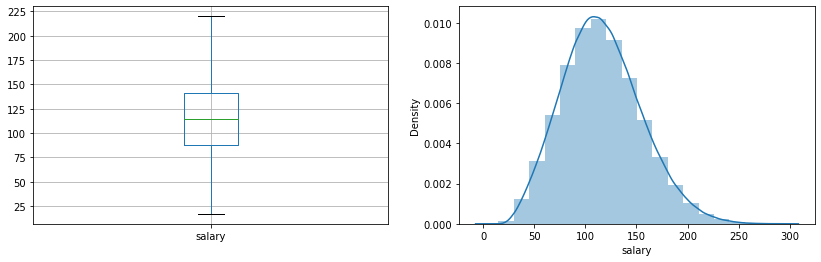

In [25]:
plt.figure(figsize = (14, 4))

plt.subplot(1,2,1)
ax = train_df['salary'].plot.box(showfliers=False,grid=True)

plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=20)

plt.show()

## Use IQR rule to identify potential outliers

In [26]:
stat = train_df.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


## Examine potential outliers

In [27]:
#check potential outlier below lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [28]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

####  These positions with no pay tend to be paid positions, not volunteer positions. We are sure that they are missing/corrupt data and that they should be excluded from the training collection.

In [29]:
#check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [30]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


#### All of the possible outliers with high salaries tend to be valid results. The majority of jobs are C-level executive positions, and the junior positions are in sectors with a reputation for high pay (oil, finance). We have determined that these submissions are valid and will not be removed.

In [31]:
#plotting numerical and categorical variables
def plot_feature(df, col):
    #state the plot size 
    plt.figure(figsize = (12, 6))
    #plot one of two plots 
    plt.subplot(1, 2, 1)
    
    #if column is numeric
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #if column is not numeric then plot the following:
        sns.countplot(x=col, data=df)
        
    #set the labels on the axis 
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    #plot two plot
    plt.subplot(1, 2, 2)
    #if column is numeric then plot the following:
    if df[col].dtype == 'int64':
        mean = df.groupby(col)['salary'].mean()
        mean.plot()
        
    else:
        #if column is not numeric then plot the following:

        sns.boxplot(x = col, y = 'salary', data=df)
        
    #set the labels on the axis    
    plt.xticks(rotation = 45)
    plt.ylabel('Salaries')

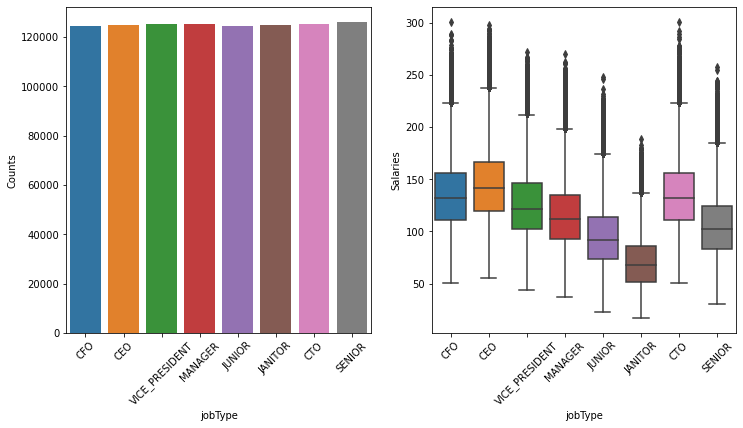

In [32]:
plot_feature(train_df, 'jobType')

#### A strong positive relationship exists between job type and pay. A higher salary corresponds to a higher position, and vice versa.

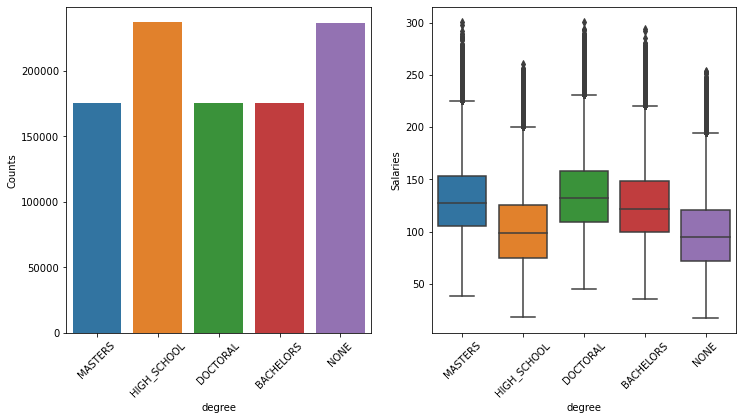

In [33]:
plot_feature(train_df, 'degree')

#### A strong positive relationship exists between degree and pay. A higher salary corresponds to a higher degree, and vice versa.

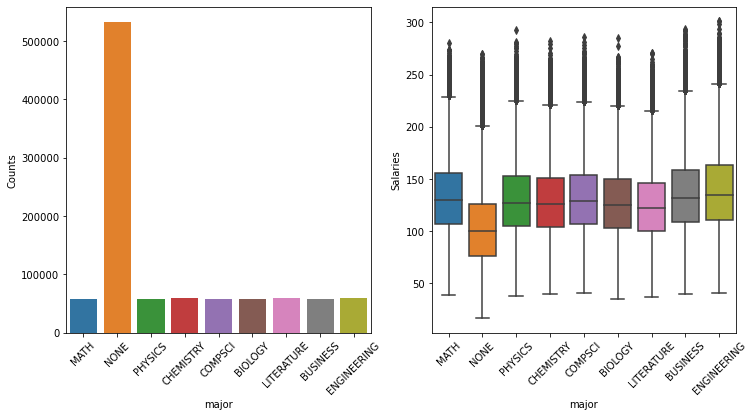

In [34]:
plot_feature(train_df, 'major')

#### People with majors of engineering, business and math generally have higher salaries.

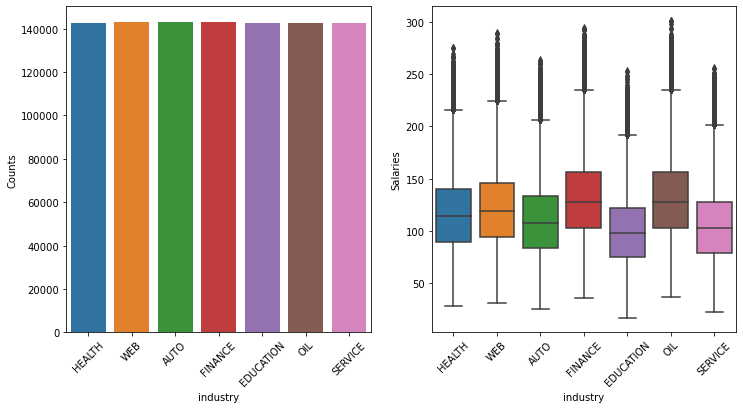

In [35]:
plot_feature(train_df, 'industry')

#### In terms of sectors, oil, finance, and web industries pay better.

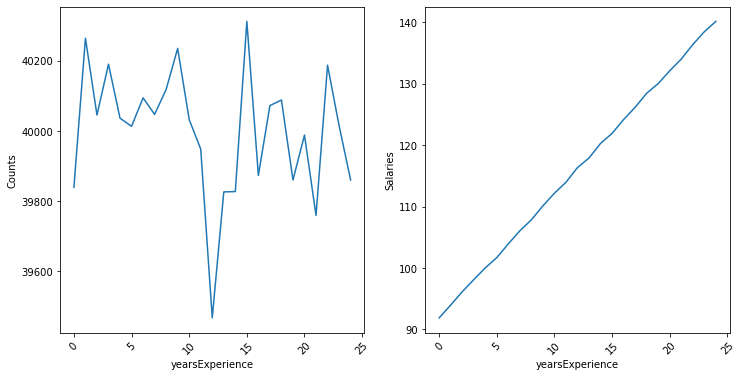

In [36]:
plot_feature(train_df, 'yearsExperience')

#### There is a direct positive connection between salary and years of experience.

## Correlation

In [37]:
correlated_data = train_df.copy()

In [38]:
# define a function to encode the categorical variables 
def Encode_Data(df):   
    for col in df.columns:        
        if df[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            df[col]=le.fit_transform(df[col])
    return df

In [39]:
#check encoded data
EncodedData = Encode_Data(correlated_data)
EncodedData

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,1,3,6,3,10,83,113
1,1,11,0,2,7,6,3,73,84
2,2,48,7,1,8,3,10,38,120
3,3,32,5,1,2,0,8,17,125
4,4,60,7,0,8,2,8,16,146
...,...,...,...,...,...,...,...,...,...
999995,999990,52,7,0,2,3,19,94,71
999996,999991,17,2,2,7,2,12,35,143
999997,999992,16,4,2,7,1,16,81,47
999998,999993,23,1,3,7,3,6,5,132


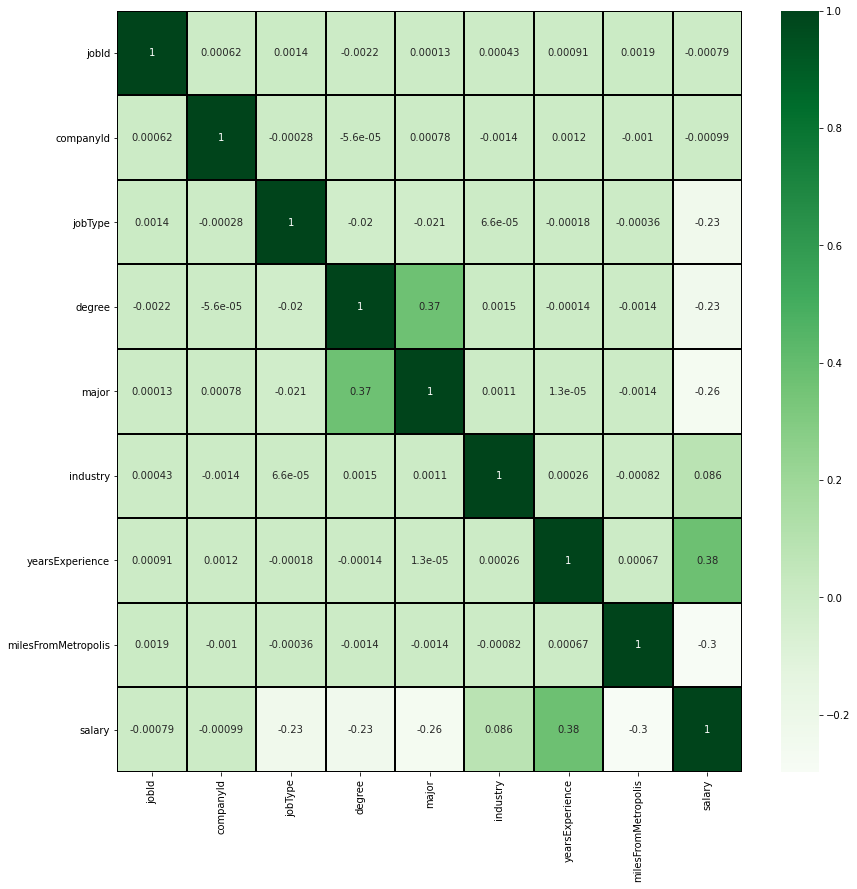

In [40]:
#correlation Matrix
plt.figure(figsize=(14,14))
corr = EncodedData.corr()
sns.heatmap(corr,xticklabels=corr.columns,
            yticklabels=corr.columns,cmap="Greens",annot=True,linewidths=1,linecolor='black')
plt.show()

#### As we can see in above graph years of `experience and salry` & `degree and major` are highly co-related with each other